In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
comments_path = 'data/comments_-33041211.pkl'
users_path = 'data/users_-33041211.pkl'

In [4]:
with open(comments_path, 'rb') as f:
    comments = pickle.load(f)
with open(users_path, 'rb') as f:
    users = pickle.load(f)

In [5]:
comments_df = pd.DataFrame(comments)

In [6]:
comments_df.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text
0,None,3222687,1476546572,310448946,0,-33041211,None,None,Мой мир никогда не станет прежним
1,None,3222688,1476546577,65801702,80,-33041211,None,None,Только Факел - только победа!!!!
2,None,3222689,1476546593,17288600,0,-33041211,None,None,и убегает с поля 😨\nумно!
3,None,3222690,1476546602,36494568,19,-33041211,None,None,Спасибо тебе родной
4,None,3222695,1476546647,146226190,3,-33041211,None,None,ОБОЖАЮ


# Preparing data

In [7]:
def university_cond(user):
    return len(user.get('universities', [])) == 1

In [8]:
def faculty_cond(user):
    return user['universities'][0].get('faculty_name') is not None

In [9]:
users_with_univ = list(filter(university_cond, users))
users_with_fac = list(filter(faculty_cond, users_with_univ))

In [10]:
len(users_with_univ), len(users_with_fac)

(13721, 10492)

In [11]:
users_with_fac[3]

{'activities': 'fanático de películas de dibujos animados (Family Guy)',
 'books': "Pikul', Strugatskiy's",
 'can_see_all_posts': 0,
 'can_see_audio': 1,
 'can_write_private_message': 1,
 'first_name': 'Vladimir',
 'id': 8126548,
 'interests': 'idiomas extranjeras',
 'last_name': 'Orlov',
 'movies': '',
 'music': 'ASOT, IKON, lounge, chill-out, Solarsoul, Placebo (primeros), Y. Schevchuk, Depeche Mode, U2 etc',
 'occupation': {'id': 446,
  'name': 'ВГУИТ (бывш. ВГТА, ВТИ)',
  'type': 'university'},
 'personal': {'alcohol': 4,
  'inspired_by': 'Хомэр Симпсон',
  'people_main': 6,
  'political': 8,
  'religion': 'I want to believe',
  'smoking': 3},
 'relation': 4,
 'relation_partner': {'first_name': 'Maria',
  'id': 3491163,
  'last_name': 'Orlova'},
 'sex': 2,
 'status': '- Следите за лишним весом? - Слежу. За тем, как он растёт.',
 'universities': [{'chair': 58493,
   'chair_name': 'Технологии молока и молочных продуктов',
   'city': 0,
   'country': 1,
   'education_form': 'Full-time

In [12]:
users_ = []
for u in users_with_fac:
    u.pop('occupation', None)
    u.pop('relation_partner', None)
    univ = u.pop('universities')[0]
    u.update({'univ_name': univ['name'], 'faculty_name': univ['faculty_name'],
              'education_form': univ.get('education_form'), 'education_status': univ.get('education_status'),
              'graduation': univ.get('graduation')})
    pers = u.pop('personal')
    if pers:
        u.update({'political': pers.get('political'), 'langs': ','.join(pers.get('langs', [])),
                  'religion': pers.get('religion'), 'inspired_by': pers.get('inspired_by'),
                  'people_main': pers.get('people_main'), 'life_main': pers.get('life_main'),
                  'smoking': pers.get('smoking'), 'alcohol': pers.get('alcohol')})
    users_.append(u)

In [13]:
users_[0]

{'activities': '',
 'alcohol': 4,
 'bdate': '19.5',
 'books': '',
 'can_see_all_posts': 0,
 'can_see_audio': 0,
 'can_write_private_message': 1,
 'education_form': 'Full-time',
 'education_status': 'Student (Specialist)',
 'faculty_name': 'Архитектурный',
 'first_name': 'Maxim',
 'graduation': 2013,
 'id': 3932177,
 'inspired_by': 'Близкие люди',
 'interests': '',
 'langs': 'Русский,English',
 'last_name': 'Smirnov',
 'life_main': 6,
 'movies': '',
 'music': '',
 'people_main': 2,
 'political': 3,
 'relation': 1,
 'religion': 'Православие',
 'sex': 2,
 'smoking': 4,
 'status': '',
 'univ_name': 'Воронежский ГАСУ'}

In [14]:
users_df = pd.DataFrame(users_)

In [15]:
with open('ing_.txt', 'w') as f:
    f.writelines('\n'.join(users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].keys().values))

In [16]:
(users_df.faculty_name.value_counts() > 4).sum()

146

In [17]:
users_df.faculty_name.value_counts()[(users_df.faculty_name.value_counts() > 4)].values.sum()

9071

In [18]:
with open('ing.txt', 'r') as f:
    ing = [line.strip() for line in f.readlines()]
with open('gum.txt', 'r') as f:
    gum = [line.strip() for line in f.readlines()]

In [19]:
ing[:3], gum[:3]

(['Экономический факультет',
  'Экономический',
  'Факультет прикладной математики, информатики и механики'],
 ['Юридический факультет',
  'Экономики и управления',
  'Экономика и управление на предприятии'])

In [20]:
users_df['is_gum'] = None

In [21]:
def get_is_gum(name):
    name = name.strip()
    if name in gum:
        return 1
    elif name in ing:
        return 0
    else: return None

In [22]:
users_df.is_gum = users_df.faculty_name.apply(get_is_gum)

In [23]:
users_df.dropna(subset=['is_gum'], inplace=True)

In [24]:
users_df.is_gum.value_counts()

1.0    4036
0.0    4012
Name: is_gum, dtype: int64

In [25]:
users_df.columns

Index(['activities', 'alcohol', 'bdate', 'books', 'can_see_all_posts',
       'can_see_audio', 'can_write_private_message', 'education_form',
       'education_status', 'faculty_name', 'first_name', 'graduation', 'id',
       'inspired_by', 'interests', 'langs', 'last_name', 'life_main', 'movies',
       'music', 'people_main', 'political', 'relation', 'religion', 'sex',
       'smoking', 'status', 'status_audio', 'univ_name', 'is_gum'],
      dtype='object')

# Demographic

## Sex

In [26]:
users_vc = users_df.is_gum.value_counts()
users_vc

1.0    4036
0.0    4012
Name: is_gum, dtype: int64

In [71]:
delta = users_vc[1] - users_vc[0]
delta

24

In [77]:
index_to_del = np.random.choice(users_df[users_df.is_gum == 1].index, delta, replace=False)

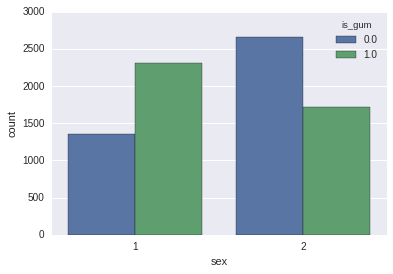

In [78]:
g = sns.countplot(x='sex', hue='is_gum',  data=users_df.drop(index_to_del))

## Alcohol

In [80]:
alcohol_df = users_df.dropna(subset=['alcohol'])
alcohol_vc = alcohol_df.is_gum.value_counts()
alcohol_vc

1.0    1487
0.0    1475
Name: is_gum, dtype: int64

In [81]:
delta = alcohol_vc[1] - alcohol_vc[0]
delta

12

In [82]:
index_to_del = np.random.choice(alcohol_df[alcohol_df.is_gum == 1].index, delta, replace=False)
alcohol_df.drop(index_to_del, inplace=True)
alcohol_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1475
0.0    1475
Name: is_gum, dtype: int64

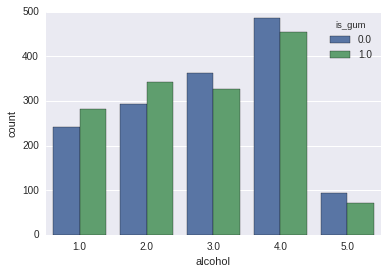

In [83]:
g = sns.countplot(x='alcohol', hue='is_gum',  data=alcohol_df)

## Smoking

In [86]:
smoking_df = users_df.dropna(subset=['smoking'])
smoking_vc = smoking_df.is_gum.value_counts()
smoking_vc

1.0    1543
0.0    1529
Name: is_gum, dtype: int64

In [87]:
delta = smoking_vc[1] - smoking_vc[0]
delta

14

In [88]:
index_to_del = np.random.choice(smoking_df[smoking_df.is_gum == 1].index, delta, replace=False)
smoking_df.drop(index_to_del, inplace=True)
smoking_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1529
0.0    1529
Name: is_gum, dtype: int64

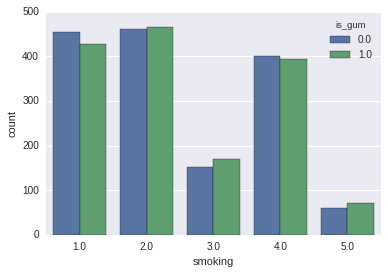

In [89]:
g = sns.countplot(x='smoking', hue='is_gum',  data=smoking_df)

## Political

In [90]:
political_df = users_df.dropna(subset=['political'])
political_vc = political_df.is_gum.value_counts()
political_vc

0.0    1508
1.0    1466
Name: is_gum, dtype: int64

In [91]:
delta = political_vc[0] - political_vc[1]
delta

42

In [92]:
index_to_del = np.random.choice(political_df[political_df.is_gum == 0].index, delta, replace=False)
political_df.drop(index_to_del, inplace=True)
political_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1466
0.0    1466
Name: is_gum, dtype: int64

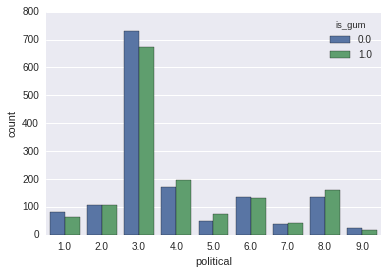

In [93]:
g = sns.countplot(x='political', hue='is_gum',  data=political_df)

## Relation

In [94]:
relation_df = users_df.dropna(subset=['relation'])
relation_vc = relation_df.is_gum.value_counts()
relation_vc

1.0    4036
0.0    4012
Name: is_gum, dtype: int64

In [95]:
delta = relation_vc[1] - relation_vc[0]
delta

24

In [96]:
index_to_del = np.random.choice(relation_df[relation_df.is_gum == 1].index, delta, replace=False)
relation_df.drop(index_to_del, inplace=True)
relation_df.is_gum.value_counts()

1.0    4012
0.0    4012
Name: is_gum, dtype: int64

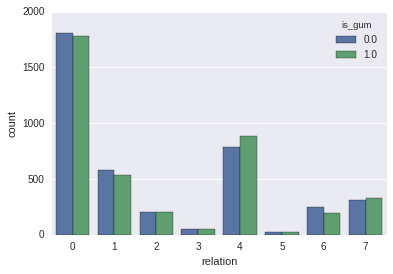

In [97]:
g = sns.countplot(x='relation', hue='is_gum',  data=relation_df)

## Life-main

In [98]:
life_main_df = users_df.dropna(subset=['life_main'])
life_main_vc = life_main_df.is_gum.value_counts()
life_main_vc

1.0    1574
0.0    1448
Name: is_gum, dtype: int64

In [99]:
delta = life_main_vc[1] - life_main_vc[0]
delta

126

In [100]:
index_to_del = np.random.choice(life_main_df[life_main_df.is_gum == 1].index, delta, replace=False)
life_main_df.drop(index_to_del, inplace=True)
life_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1448
0.0    1448
Name: is_gum, dtype: int64

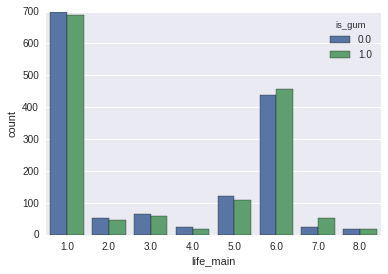

In [101]:
g = sns.countplot(x='life_main', hue='is_gum',  data=life_main_df)

## People-main

In [102]:
people_main_df = users_df.dropna(subset=['people_main'])
people_main_vc = people_main_df.is_gum.value_counts()
people_main_vc

1.0    1610
0.0    1510
Name: is_gum, dtype: int64

In [103]:
delta = people_main_vc[1] - people_main_vc[0]
delta

100

In [104]:
index_to_del = np.random.choice(people_main_df[people_main_df.is_gum == 1].index, delta, replace=False)
people_main_df.drop(index_to_del, inplace=True)
people_main_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1.0    1510
0.0    1510
Name: is_gum, dtype: int64

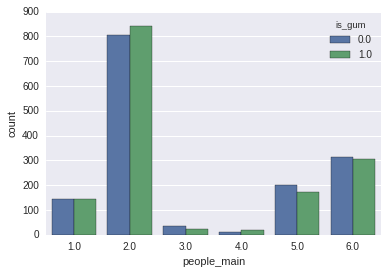

In [105]:
g = sns.countplot(x='people_main', hue='is_gum',  data=people_main_df)

## Month

In [106]:
users_df.bdate = pd.to_datetime(users_df.bdate, errors='coerce')

In [107]:
bdate_df = users_df.dropna(subset=['bdate'])

In [108]:
bdate_vc = bdate_df.is_gum.value_counts()
bdate_vc

0.0    2141
1.0    2095
Name: is_gum, dtype: int64

In [109]:
delta = bdate_vc[0] - bdate_vc[1]
delta

46

In [110]:
index_to_del = np.random.choice(bdate_df[bdate_df.is_gum == 0].index, delta, replace=False)
index_to_del.shape

(46,)

In [111]:
bdate_df.drop(index_to_del, inplace=True)
bdate_df.is_gum.value_counts()

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1.0    2095
0.0    2095
Name: is_gum, dtype: int64

In [60]:
bdate_df['bmonth'] = bdate_df.bdate.apply(lambda x: x.month if x else x)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


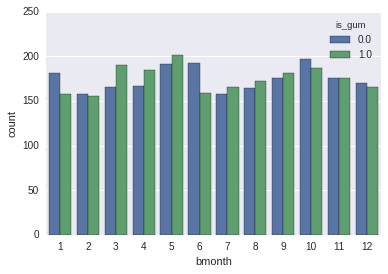

In [61]:
g = sns.countplot(x='bmonth', hue='is_gum',  data=bdate_df)

# Comments

In [112]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552261 entries, 0 to 2552260
Data columns (total 9 columns):
attachments     object
comment_id      int64
date            int64
from_id         int64
likes           int64
owner_id        object
reply_to_cid    object
reply_to_uid    object
text            object
dtypes: int64(4), object(5)
memory usage: 175.2+ MB


In [113]:
comments_merged = comments_df.merge(users_df[['id', 'is_gum']], left_on='from_id', right_on='id', how='inner')

In [114]:
comments_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185191 entries, 0 to 185190
Data columns (total 11 columns):
attachments     10364 non-null object
comment_id      185191 non-null int64
date            185191 non-null int64
from_id         185191 non-null int64
likes           185191 non-null int64
owner_id        185191 non-null object
reply_to_cid    0 non-null object
reply_to_uid    0 non-null object
text            185191 non-null object
id              185191 non-null int64
is_gum          185191 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 17.0+ MB


In [115]:
comments_merged.head()

,attachments,comment_id,date,from_id,likes,owner_id,reply_to_cid,reply_to_uid,text,id,is_gum
0,None,3222718,1476546928,360037882,1,-33041211,None,None,"[id352784000|Алексей], 2:1",360037882,0.0
1,None,3222727,1476547133,360037882,35,-33041211,None,None,НАТЯНУЛИ МОСКВиЧЕЙ!!! ТЕПЕРЬ МОЖНО И ДОМОЙ ИХ ...,360037882,0.0
2,None,3224133,1476602531,360037882,0,-33041211,None,None,"[id34736142|Андрей], не имеет значение где ЮР,...",360037882,0.0
3,None,3224161,1476604171,360037882,0,-33041211,None,None,"[id34736142|Андрей], где СК удобнее там и пров...",360037882,0.0
4,None,3199309,1475398737,360037882,9,-33041211,None,None,Сегодня в 23:00 до 5:00 собираемся все НА АРЕН...,360037882,0.0


In [66]:
comments_merged.from_id.value_counts()

141199295    6611
81632165     4560
68148212     4537
140659391    4341
283273320    3489
139229595    2807
21007618     2642
20731166     2236
3783367      2205
7472644      1797
87416643     1713
191122455    1704
30072947     1489
174577926    1461
13411441     1459
44471523     1418
8838652      1368
146596115    1368
72723135     1175
234927132    1064
56781881      917
180428287     908
312038515     896
23778575      870
14035669      848
41103994      822
68791881      747
8626809       726
6422010       692
23708285      684
             ... 
205907104       1
12782965        1
19847313        1
167459541       1
147104776       1
45103078        1
55583640        1
25072462        1
115525688       1
264666835       1
98215604        1
103797040       1
2109723         1
26514191        1
21125846        1
141157025       1
150053886       1
259209850       1
142311878       1
70912907        1
132329723       1
30455562        1
146256107       1
154928480       1
164487329 

In [116]:
comments_merged[comments_merged.from_id == 11909034].values

array([[None, 978518, 1393187904, 11909034, 1, '-33041211', None, None,
        '[id225131334|Виктор], в граде.магазин боско.еще был у стадиона труд',
        11909034, 1.0]], dtype=object)

In [117]:
comments_merged.is_gum.value_counts()

0.0    94355
1.0    90836
Name: is_gum, dtype: int64

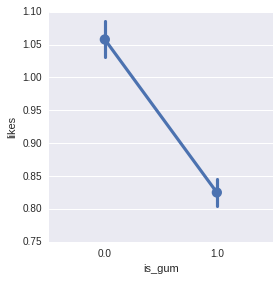

In [118]:
sns.factorplot(x='is_gum', y='likes', data=comments_merged)

In [136]:
index_to_del = comments_merged[comments_merged.text == ''].index
comments_merged.drop(index_to_del, inplace=True)
comments_merged.shape

(177508, 11)

In [137]:
comments_merged[['from_id', 'text', 'is_gum']].to_csv('data/comments.csv.gz', index=False, compression='gzip')